## Assignment

*Cell contents will be deleted prior to final submission:*

Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be imporant information for the company.

For this hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.

To complete this project, you will need to turn in the following 3 deliverables:

A Jupyter Notebook containing any code you've written for this project.
A Blog Post explaining your process, methodology, and findings.
An "Executive Summary" PowerPoint Presentation that explains the hypothesis tests you ran, your findings, and their relevance to company stakeholders.
Jupyter Notebook Must-Haves
For this project, your jupyter notebook should meet the following specifications:

Organization/Code Cleanliness

The notebook should be well organized, easy to follow, and code is commented where appropriate.

Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.

The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.

Any SQL code written to source data should also be included.
Findings

Your notebook should clearly show how you arrived at your results for each hypothesis test, including how you calculated your p-values.

You should also include any other statistics that you find relevant to your analysis, such as effect size.

# Northwind Co: Company Sales Analysis

## Flatiron Module 2 Project:

Testing to see how these appear on GitHub, will delete one:

![Paul](Paul.jpeg)


<img src = "Paul.jpeg" align="left"/>

Paul Woody

### Project Overview:
For this project, we'll be exploring the data provided by our client containing companywide sales data for a range of products.  Our goal is to derive the significance of discounts on overall sales as well as to provide the client with additional business recommendations to bolster company sales. 

To complete our analysis, we will follow the OSEMN Data Science process as outlined [here](http://www.dataists.com/tag/osemn/).

![OSEMN PROCESS](Data-Science_OSEMN-Framework.png)
[Credit](https://www.thelead.io/data-science/5-steps-to-a-data-science-project-lifecycle)

**1. Obtain Data**
    - Load dataset provided by client
**2. Pre-Process/Scrub Data**
    - Ensure that missing values are handled appropriately
    - Ensure that all data is cast to the correct dtype, and that any non-sensical datapoints are scrubbed or dropped from our dataset.
**3. Explore Data**
    - Cluster, visualize, and view correlations between features in the dataset 
    - Identify the aims of the project in the form of clearly articulated business questions
**4. Hypothesis Testing**
    - Utilize hypothesis testing to evaluate the results questions posed in the data exploration phase.
    - Utilize various statistical methodologies to evaluate significace of results
**5. Interpret, Review Results**
    - Using the results of hypothesis/significance testing, evaluate the business questions posed in Step 3
    - Articulate business recommendations based on the results of testing at appropriate confidence intervals
    - Identify potential improvements or factors that may skew the obtained results 
    - Identify suggested next steps for client

# Paul's Notes: Rubric
*Delete before final submission*

#### 1: Pick a novel interesting problem at appropriate challenge level
Business case constructed clearly. And answered an obvious question, like clearly articulated the business stakeholder requirements that the project aims to accomplish. Combine questions in unique ways like how do discounts affect product sales?

For example, analyzed the dataset from the point of view of sales, business stakeholders, a startup that would use this business model, want to expand into new geographical regions, specialize in different product lines, etc.

1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?
2. Do discounts have statistically significant effect on number of products customers order on a regional level? If so, which region(s) ...?
3. Are discounts more effective on "expensive" products?
4. Customer Demographics and Discounts
5. Regions and efficacy of Discounts
6. Season and discounts
7. Does discount affect sales by product category?
8. Does discount affect sales volume (PDF)

#### 2: Preprocess Data:
Import the data and preprocess the data that includes cleaning, scrubbing, handling missing values, etc.

#### 3: Describe Data:
Use EDA to create meaningful visualizations that describe your data. Plotting words to show cosine similarity, showing plots for class imbalance, etc.

3 or more visualizations are present in the notebook and visualizations are relevant to the project in a technical or business sense.

#### 4: Fit Model/Hypothesis Testing:
Hypothesis Tests are ran correctly taking into account standard deviations and normality of distributions.

Correct hypotheses tests are ran and are supported using analysis. The subsequent business decisions following the hypotheses are correctly identified, and articulated. Future work is explored.

#### 5: Present to Technical Audience:
Present work done to a technical audience with code, insights, summary, future work, and even a live demo. RECORDED.

#### 6: Present to non-technical audience:
Present work done to a non- technical(business focused) audience with problem statement, business value, methodology explained simply, business recommendations, summary, and future work.

#### 7: Write Quality Code:
Code is non-repetative and uses OOP when necessary to avoid reptition. Custom methods/classes contain docstrings to help the reader understand what is happening. Variables have names that are relevant to what they represent.

Code follows pep-8 standards, contains docstrings/comments, does not repeat itself and uses custom classes methods for tasks.

## 1. Obtain Data / Import Libraries

In [1]:
# Importing Libraries to process/analyze data:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import numpy as np
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pprint
from collections import Counter
import itertools
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import warnings
#warnings.filterwarnings("ignore")

#### Provided ERD for Northwind Co:
![Northwind ERD](Northwind_ERD.png)

In [2]:
# Creating engine and binding to target database:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [3]:
from sqlalchemy import inspect
inspector = inspect(engine)

# Viewing Table Names to compare with ERD:
pprint.pprint(inspector.get_table_names())

2019-06-16 18:16:26,742 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-16 18:16:26,743 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,744 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-16 18:16:26,745 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,747 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-16 18:16:26,748 INFO sqlalchemy.engine.base.Engine ()
['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']


As demonstrated by the output of table names above, there are many discrepancies between the Table/Column names in the provided ERD and in the actual database. In order to successfully scrub/explore the dataset, we must first verify the table/column names in our database, as well as account for missing values and improperly stored dtypes.

In [4]:
# Creating Function to give information for each column in a table:
def get_column_info(table):
    cols_list = inspector.get_columns(table)
    print('')
    print('------------------------------------------------------------------------')
    print(f'Table Name: {table}, Primary Key: {inspector.get_primary_keys(table)}')
    print('------------------------------------------------------------------------')
    print('')
    for column in cols_list:
        print(f"Column Name: {column['name']}, Column Type: {column['type']}")

In [5]:
# Using above function to iterate over all tables:
tables = inspector.get_table_names()
for table in tables:
    print(get_column_info(table))

2019-06-16 18:16:26,764 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-06-16 18:16:26,765 INFO sqlalchemy.engine.base.Engine ()

------------------------------------------------------------------------
2019-06-16 18:16:26,768 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-06-16 18:16:26,768 INFO sqlalchemy.engine.base.Engine ()
Table Name: Category, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: INTEGER
Column Name: CategoryName, Column Type: VARCHAR(8000)
Column Name: Description, Column Type: VARCHAR(8000)
None
2019-06-16 18:16:26,772 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-06-16 18:16:26,772 INFO sqlalchemy.engine.base.Engine ()

------------------------------------------------------------------------
2019-06-16 18:16:26,774 INFO

Table Name: Product, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: INTEGER
Column Name: ProductName, Column Type: VARCHAR(8000)
Column Name: SupplierId, Column Type: INTEGER
Column Name: CategoryId, Column Type: INTEGER
Column Name: QuantityPerUnit, Column Type: VARCHAR(8000)
Column Name: UnitPrice, Column Type: DECIMAL
Column Name: UnitsInStock, Column Type: INTEGER
Column Name: UnitsOnOrder, Column Type: INTEGER
Column Name: ReorderLevel, Column Type: INTEGER
Column Name: Discontinued, Column Type: INTEGER
None
2019-06-16 18:16:26,820 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Region")
2019-06-16 18:16:26,821 INFO sqlalchemy.engine.base.Engine ()

------------------------------------------------------------------------
2019-06-16 18:16:26,823 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Region' AND typ

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SADeprecationWarning: The Inspector.get_primary_keys() method is deprecated and will be removed in a future release.  Please refer to the Inspector.get_pk_constraint() method.
  


In [6]:
table_list = ['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

In [7]:
'''
for table in table_list:
    df_[table] = pd.read_sql_query("SELECT * FROM df_[table]", engine)
    print(df_[table])
'''

'\nfor table in table_list:\n    df_[table] = pd.read_sql_query("SELECT * FROM df_[table]", engine)\n    print(df_[table])\n'

In [8]:
# Creating DataFrames for each table in the Northwind Database:
df_category = pd.read_sql_query("SELECT * FROM Category", engine)
df_customer = pd.read_sql_query("SELECT * FROM Customer", engine)
df_customercustomerdemo = pd.read_sql_query("SELECT * FROM CustomerCustomerDemo", engine)
df_customerdemographic = pd.read_sql_query("SELECT * FROM CustomerDemographic", engine)
df_employee = pd.read_sql_query("SELECT * FROM Employee", engine)
df_employeeterritory = pd.read_sql_query("SELECT * FROM EmployeeTerritory", engine)
df_order = pd.read_sql_query("SELECT * FROM 'Order'", engine)
df_orderdetail = pd.read_sql_query("SELECT * FROM OrderDetail", engine)
df_product = pd.read_sql_query("SELECT * FROM Product", engine)
df_region = pd.read_sql_query("SELECT * FROM Region", engine)
df_shipper = pd.read_sql_query("SELECT * FROM Shipper", engine)
df_supplier = pd.read_sql_query("SELECT * FROM Supplier", engine)
df_territory = pd.read_sql_query("SELECT * FROM Territory", engine)

2019-06-16 18:16:26,863 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2019-06-16 18:16:26,864 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,868 INFO sqlalchemy.engine.base.Engine SELECT * FROM Customer
2019-06-16 18:16:26,868 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,874 INFO sqlalchemy.engine.base.Engine SELECT * FROM CustomerCustomerDemo
2019-06-16 18:16:26,875 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,878 INFO sqlalchemy.engine.base.Engine SELECT * FROM CustomerDemographic
2019-06-16 18:16:26,878 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,881 INFO sqlalchemy.engine.base.Engine SELECT * FROM Employee
2019-06-16 18:16:26,881 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,886 INFO sqlalchemy.engine.base.Engine SELECT * FROM EmployeeTerritory
2019-06-16 18:16:26,887 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:26,890 INFO sqlalchemy.engine.base.Engine SELECT * FROM 'Order'
2019-06-16 18:16:26,890

In [9]:
# Reviewing the length of each table:
linespacer = '-------------------------------'
print('')
print('Reviewing Length of Tables, Stored as DataFrames: ')
print(linespacer+'------------------')
print('')
print('')
print(f'Category DF Len: {len(df_category)}')
print(linespacer)
print(f'Customer DF Len: {len(df_customer)}')
print(linespacer)
print(f'CustomerCustomerDemo DF Len: {len(df_customercustomerdemo)}')
print(linespacer)
print(f'CustomerDemographic DF Len: {len(df_customerdemographic)}')
print(linespacer)
print(f'Employee DF Len: {len(df_employee)}')
print(linespacer)
print(f'EmployeeTerritory DF Len: {len(df_employeeterritory)}')
print(linespacer)
print(f'Order DF Len: {len(df_order)}')
print(linespacer)
print(f'OrderDetail DF Len: {len(df_orderdetail)}')
print(linespacer)
print(f'Product DF Len: {len(df_product)}')
print(linespacer)
print(f'Region DF Len: {len(df_region)}')
print(linespacer)
print(f'Shipper DF Len: {len(df_shipper)}')
print(linespacer)
print(f'Supplier DF Len: {len(df_supplier)}')
print(linespacer)
print(f'Territory DF Len: {len(df_territory)}')


Reviewing Length of Tables, Stored as DataFrames: 
-------------------------------------------------


Category DF Len: 8
-------------------------------
Customer DF Len: 91
-------------------------------
CustomerCustomerDemo DF Len: 0
-------------------------------
CustomerDemographic DF Len: 0
-------------------------------
Employee DF Len: 9
-------------------------------
EmployeeTerritory DF Len: 49
-------------------------------
Order DF Len: 830
-------------------------------
OrderDetail DF Len: 2155
-------------------------------
Product DF Len: 77
-------------------------------
Region DF Len: 4
-------------------------------
Shipper DF Len: 3
-------------------------------
Supplier DF Len: 29
-------------------------------
Territory DF Len: 53


## 2. Pre-Process/Scrub Data

#### Category Table Scrubbing:

In [10]:
# Viewing Category Table:
df_category.head()

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [11]:
print(df_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None


In [12]:
df_category.isna().sum()

Id              0
CategoryName    0
Description     0
dtype: int64

In [13]:
df_category.CategoryName.unique()

array(['Beverages', 'Condiments', 'Confections', 'Dairy Products',
       'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood'],
      dtype=object)

#### Customer Table Scrubbing:

In [14]:
# Viewing Customer DataFrame:
df_customer.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [15]:
# Determining Presence of null values:
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None


In [16]:
df_customer.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [17]:
# Dropping the 'Fax' column:
df_customer.drop(['Fax'], axis=1, inplace=True)

In [18]:
# Replacing missing values:
df_customer.PostalCode.fillna('0', inplace=True)

In [19]:
# Re-reviewing Customer DataFrame:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      91 non-null object
Country         91 non-null object
Phone           91 non-null object
dtypes: object(10)
memory usage: 7.2+ KB


In [20]:
# Viewing Unique Values for ContactTitle:
df_customer.ContactTitle.unique()
# We can consider exploring purchasing trends between department or seniority within a company:

array(['Sales Representative', 'Owner', 'Order Administrator',
       'Marketing Manager', 'Accounting Manager', 'Sales Agent',
       'Sales Associate', 'Sales Manager', 'Marketing Assistant',
       'Assistant Sales Agent', 'Assistant Sales Representative',
       'Owner/Marketing Assistant'], dtype=object)

In [21]:
# Viewing Unique Values for Region:
print(f'Region column unique values: \n{df_customer.Region.unique()}\n')

print(f'Region column unique value counts: \n{df_customer.Region.value_counts().unique()}')

Region column unique values: 
['Western Europe' 'Central America' 'British Isles' 'Northern Europe'
 'Southern Europe' 'North America' 'South America' 'Scandinavia'
 'Eastern Europe']

Region column unique value counts: 
[28 16 10  8  5  4  3  1]


We might consider exploring whether discounts have a statistically significant difference in efficacy across regions. Depending on customers/region and orders/region, some regions may be excluded from analysis due to small sample size.

#### CustomerCustomerDemo Table Scrubbing:

In [22]:
# Reviewing CustomerCustomerDemo DataFrame:
df_customercustomerdemo.head()

,Id,CustomerTypeId


In [23]:
print(df_customercustomerdemo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


#### CustomerDemographic Table Scrubbing:

In [24]:
# Reviewing CustomerDemographic DataFrame:
df_customerdemographic.head()

,Id,CustomerDesc


In [25]:
print(df_customerdemographic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id              0 non-null object
CustomerDesc    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None


#### Employee Table Scrubbing:

In [26]:
# Reviewing Employee DataFrame:
df_employee.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [27]:
# Determining Presence of null values:
print(df_employee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None


In [28]:
# Dropping the 'Photo' Column:
df_employee.drop('Photo', axis=1, inplace=True)

In [29]:
# Filling in null values with column mode:
df_employee.ReportsTo.fillna(2.0, inplace=True)

In [30]:
# Re-reviewing Employee DataFrame
df_employee.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,Andrew received his BTS commercial in 1974 and...,2.0,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [31]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 17 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Notes              9 non-null object
ReportsTo          9 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 1.3+ KB


#### EmployeeTerritory Table Scrubbing:

In [32]:
# Reviewing EmployeeTerritory DataFrame:
df_employeeterritory.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [33]:
print(df_employeeterritory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
None


In [34]:
print(len(df_employeeterritory.EmployeeId.unique()))

9


#### Order Table Scrubbing:

In [35]:
# Reviewing Order DataFrame:
df_order.head(50)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
5,10253,HANAR,3,2012-07-10,2012-07-24,2012-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
6,10254,CHOPS,5,2012-07-11,2012-08-08,2012-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
7,10255,RICSU,9,2012-07-12,2012-08-09,2012-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
8,10256,WELLI,3,2012-07-15,2012-08-12,2012-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil
9,10257,HILAA,4,2012-07-16,2012-08-13,2012-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America,5022,Venezuela


In [36]:
# Investigating Order DataFrame for the presence of null values:
print(df_order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


In [37]:
# Dropping ShipPostalCode Column, as we have City/Region/Country info:
df_order.drop('ShipPostalCode', axis=1, inplace=True)

### See Note Below:

In [38]:
# May reconsider how I treat null values in ShippedDate Column********
df_order.ShippedDate.fillna('0', inplace=True)

In [39]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 13 columns):
Id              830 non-null int64
CustomerId      830 non-null object
EmployeeId      830 non-null int64
OrderDate       830 non-null object
RequiredDate    830 non-null object
ShippedDate     830 non-null object
ShipVia         830 non-null int64
Freight         830 non-null float64
ShipName        830 non-null object
ShipAddress     830 non-null object
ShipCity        830 non-null object
ShipRegion      830 non-null object
ShipCountry     830 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 84.4+ KB


#### OrderDetail Table Scrubbing:

In [40]:
# Reviewing OrderDetail DataFrame:
df_orderdetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [41]:
print(df_orderdetail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB
None


#### Product Table Scrubbing:

In [42]:
# Reviewing Product DataFrame:
df_product.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [43]:
# Viewing number of "Discontinued" Products:
df_product.Discontinued.value_counts()

0    69
1     8
Name: Discontinued, dtype: int64

For the purposes of our analysis, we will ignore the presence of Discontinued Products. Should we find that specific Discontinued products perform as good or better than other products in the dataset, we may recommend that Northwind choose to restock these products.

In a future project, Northwind may also consider investigating the sales performance of specific products on a regional or national level to maximize product performance, reduce shipping costs, and reduce shrink through order size optimization.

### May need to map SupplierId and CategoryId

In [44]:
print(df_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
None


In [45]:
# Create column that contains number of units

#### Region Table Scrubbing:

In [46]:
# Reviewing Region DataFrame:
df_region.head()

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [47]:
print(df_region.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None


In [48]:
# Consider One-Hot-Encoding Here

## Idea - One hot encode regions and look to compare discount effect in each region

#### Shipper Table Scrubbing:

In [49]:
# Reviewing Shipper DataFrame:
df_shipper.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [50]:
print(df_shipper.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes
None


#### Supplier Table Scrubbing:

In [51]:
# Reviewing Supplier DataFrame
df_supplier.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [52]:
# Investigating Supplier DataFrame for presence of Null Values
print(df_supplier.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
Fax             13 non-null object
HomePage        5 non-null object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB
None


In [53]:
# Dropping the 'Fax' and 'HomePage' columns:
df_supplier.drop(['Fax', 'HomePage'], axis=1, inplace=True)

In [54]:
df_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
dtypes: int64(1), object(9)
memory usage: 2.3+ KB


#### Territory Table Scrubbing:

In [55]:
# Reviewing Territory DataFrame:
df_territory.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [56]:
print(df_territory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [57]:
# Reviewing the length of each DataFrame
print(f'Category DF Len: {len(df_category)}')
print(f'Customer DF Len: {len(df_customer)}')
print(f'CustomerCustomerDemo DF Len: {len(df_customercustomerdemo)}')
print(f'CustomerDemographic DF Len: {len(df_customerdemographic)}')
print(f'Employee DF Len: {len(df_employee)}')
print(f'EmployeeTerritory DF Len: {len(df_employeeterritory)}')
print(f'Order DF Len: {len(df_order)}')
print(f'OrderDetail DF Len: {len(df_orderdetail)}')
print(f'Product DF Len: {len(df_product)}')
print(f'Region DF Len: {len(df_region)}')
print(f'Shipper DF Len: {len(df_shipper)}')
print(f'Supplier DF Len: {len(df_supplier)}')
print(f'Territory DF Len: {len(df_territory)}')

Category DF Len: 8
Customer DF Len: 91
CustomerCustomerDemo DF Len: 0
CustomerDemographic DF Len: 0
Employee DF Len: 9
EmployeeTerritory DF Len: 49
Order DF Len: 830
OrderDetail DF Len: 2155
Product DF Len: 77
Region DF Len: 4
Shipper DF Len: 3
Supplier DF Len: 29
Territory DF Len: 53


## 3. Data Exploration:

Before further investigating the dataset, we should first re-state the scope of our inquiry by writing 'guiding questions' that we'll answer in order to make targeted business recommendations for Northwind.

1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?
2. Do discounts have statistically significant effect on number of products customers order on a regional level? If so, which region(s) ...?
3. Are discounts more effective on "expensive" products?
4. Customer Demographics and Discounts
5. Regions and efficacy of Discounts
6. Season and discounts
7. Does discount affect sales by product category?
8. Does discount affect sales volume (PDF)

### Functions I am/may use:

In [58]:
# Calculate Population Mean:
def calculate_mu(x):
    d = float(sum(x.values)/len(x))
    return (d)

In [59]:
'''
# Calculate Sample Means:
def calc_sample_means(sample_size, data):
    n = sample_size
    
    # Calc population mean:
    mu = calculate_mu(data)
    print(f'Population Mean: {mu}')
    
    # Generate all combinations using given sample size 'n':
    combs = list(itertools.combinations(data, n))
    print(f'Combinations: {combs}')
    
    # Calculate Sample Means
    x_bar_list = []
    
    for i in range(len(combs)):
        sum = 0
        for j in range n:
            key = combs[i][j]
'''

"\n# Calculate Sample Means:\ndef calc_sample_means(sample_size, data):\n    n = sample_size\n    \n    # Calc population mean:\n    mu = calculate_mu(data)\n    print(f'Population Mean: {mu}')\n    \n    # Generate all combinations using given sample size 'n':\n    combs = list(itertools.combinations(data, n))\n    print(f'Combinations: {combs}')\n    \n    # Calculate Sample Means\n    x_bar_list = []\n    \n    for i in range(len(combs)):\n        sum = 0\n        for j in range n:\n            key = combs[i][j]\n"

In [60]:
df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders
            FROM [Order] o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY
            c.CompanyName ORDER BY num_orders DESC;""", engine)
df.head()

2019-06-16 18:16:27,429 INFO sqlalchemy.engine.base.Engine SELECT o.ID, c.CompanyName, Count(*) num_orders
            FROM [Order] o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY
            c.CompanyName ORDER BY num_orders DESC;
2019-06-16 18:16:27,430 INFO sqlalchemy.engine.base.Engine ()


,Id,CompanyName,num_orders
0,11064,Save-a-lot Markets,31
1,11072,Ernst Handel,30
2,11021,QUICK-Stop,28
3,11050,Folk och fä HB,19
4,11063,Hungry Owl All-Night Grocers,19


In [61]:
metadata = MetaData()
metadata.reflect(engine)

Base = automap_base(metadata=metadata)
Base.prepare()

2019-06-16 18:16:27,442 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-16 18:16:27,443 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,445 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-06-16 18:16:27,445 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,447 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-06-16 18:16:27,447 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,448 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-06-16 18:16:27,449 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,450 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-06-16 18:16:27,451 INFO sqlalchemy.engine.base.Engin

2019-06-16 18:16:27,523 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-06-16 18:16:27,523 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,525 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-06-16 18:16:27,525 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,526 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-06-16 18:16:27,527 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,528 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-06-16 18:16:27,529 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,530 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-06-16 18:16:27,530 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,532 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-06-16 18:16:27,601 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-06-16 18:16:27,602 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,604 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-06-16 18:16:27,606 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,607 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-06-16 18:16:27,607 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,609 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-06-16 18:16:27,609 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,611 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-06-16 18:16:27,612 INFO sqlalchemy.engine.base.Engine ()
2019-06-16 18:16:27,613 INFO 

In [62]:
'''
meta = MetaData()
meta.reflect(bind=engine)
users_table = meta.tables['users']
addresses_table = meta.tables['addresses']

pprint.pprint(users_table)

tables

metadata = MetaData()
metadata.reflect(engine)

Base = automap_base(metadata=metadata)
Base.prepare()

# This is an incomplete function to map tables to classes:
'''

"\nmeta = MetaData()\nmeta.reflect(bind=engine)\nusers_table = meta.tables['users']\naddresses_table = meta.tables['addresses']\n\npprint.pprint(users_table)\n\ntables\n\nmetadata = MetaData()\nmetadata.reflect(engine)\n\nBase = automap_base(metadata=metadata)\nBase.prepare()\n\n# This is an incomplete function to map tables to classes:\n"

In [63]:
'''
def prepare_classes(tables):
    class_list = []
    for table in tables:
        table = class_list.append('Base.classes.'+table)
    return class_list
bases = prepare_classes(tables)
bases
'''

"\ndef prepare_classes(tables):\n    class_list = []\n    for table in tables:\n        table = class_list.append('Base.classes.'+table)\n    return class_list\nbases = prepare_classes(tables)\nbases\n"

## 1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?


#### 1a. Do discounts have a statistically significant effect on the number of products customers order?
* $H_{0}:$ Discount has no effect on the number of products ordered.
* $H_{a}:$ Discount does have an effect on number of products ordered.
* $\alpha$ = 0.05

In [64]:
# Creating new DataFrame:
df_discount_basic = pd.read_sql_query("""SELECT ProductId, UnitPrice, Quantity, Discount FROM OrderDetail""", engine)
df_discount_basic.head()

2019-06-16 18:16:27,666 INFO sqlalchemy.engine.base.Engine SELECT ProductId, UnitPrice, Quantity, Discount FROM OrderDetail
2019-06-16 18:16:27,667 INFO sqlalchemy.engine.base.Engine ()


,ProductId,UnitPrice,Quantity,Discount
0,11,14.0,12,0.0
1,42,9.8,10,0.0
2,72,34.8,5,0.0
3,14,18.6,9,0.0
4,51,42.4,40,0.0


In [65]:
# Creating a new column to identify presence of Discount/no Discount:
df_discount_basic['DiscBool'] = df_discount_basic['Discount'].apply(lambda x: 0 if x == 0 else 1)

In [66]:
# Since nearly every discount value is a multiple of .05, we will discard other values.
df_discount_basic.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [67]:
# Dropping values where Discount%.05 != 0:
df_discount_basic = df_discount_basic[df_discount_basic.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
df_discount_basic.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,40.805776,26.203987,23.895203,0.056265,0.386586
std,22.148297,29.855453,19.009580,0.083586,0.487081
min,1.000000,2.000000,1.000000,0.000000,0.000000
25%,22.000000,12.000000,10.000000,0.000000,0.000000
50%,41.000000,18.400000,20.000000,0.000000,0.000000
75%,60.000000,32.000000,30.000000,0.100000,1.000000
max,77.000000,263.500000,130.000000,0.250000,1.000000


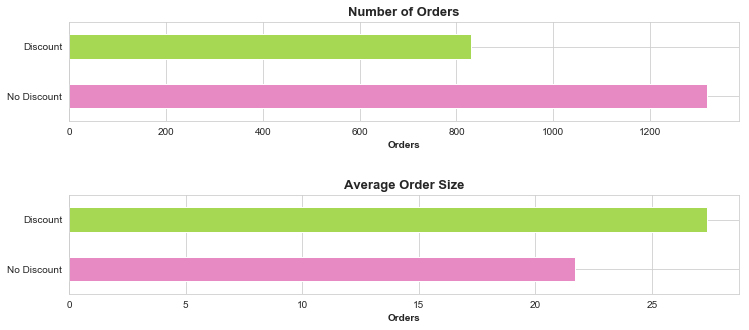

In [68]:
# Visualizing Number of Orders and Average Order Size by hue DiscBool:
fig, axes = plt.subplots(2, 1, figsize=(12,5))

# Grouping DataFrame for visualization:
df_discount_basic.groupby(['DiscBool'])['Quantity'].count().plot(kind='barh', ax=axes[0], color=['#E78AC3', '#A6D854'])
df_discount_basic.groupby(['DiscBool'])['Quantity'].mean().plot(kind='barh', ax=axes[1], color=['#E78AC3', '#A6D854'])

# Subplot 1 Labels:
axes[0].set_title('Number of Orders', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Orders', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', 'Discount'])

#Subplot 2 Labels:
axes[1].set_title('Average Order Size', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Orders', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', 'Discount'])
fig.subplots_adjust(hspace=.75);

In [ ]:
# Difference Between Number of Orders and Avg Size by hue Discount:
print(f"- There were **{df_discount_basic.groupby(['DiscBool'])['Quantity'].count()[0] - df_discount_basic.groupby(['DiscBool'])['Quantity'].count()[1]}** more orders made where there was no discount.")
print(f"- The average order size for discounted items was **{df_discount_basic.groupby(['DiscBool'])['Quantity'].mean()[1] - df_discount_basic.groupby(['DiscBool'])['Quantity'].mean()[0]}** items greater than the order size when there was no discount.")     

- There were **487** more orders made where there was no discount.
- The average order size for discounted items was **5.638954908472158** items greater than the order size when there was no discount.



As seen above, while there are less orders made for discounted items, the average order size when purchasing discounted items is larger. In order to determine the effect of any discount to sales, we will determine whether the differences illustrated above are stastically significant.

*Note: This initial inquiry does not factor in item price or discount level.*



In [ ]:
# Create DataFrame where value for Discount > 0:
query1 = 'DiscBool > 0'
df_discount_bool = df_discount_basic.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'DiscBool == 0'
df_nodiscount_bool = df_discount_basic.query(query2)

In [ ]:
df_discount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,830.000000,830.000000,830.000000,830.000000,830.0
mean,39.868675,26.255482,27.354217,0.145542,1.0
std,22.019037,30.091176,20.720667,0.071250,0.0
min,1.000000,2.000000,1.000000,0.050000,1.0
25%,21.000000,12.125000,12.250000,0.100000,1.0
50%,40.000000,18.000000,20.000000,0.150000,1.0
75%,59.000000,31.230000,36.000000,0.200000,1.0
max,77.000000,263.500000,130.000000,0.250000,1.0


In [ ]:
df_nodiscount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DiscBool
count,1317.000000,1317.000000,1317.000000,1317.0,1317.0
mean,41.396355,26.171534,21.715262,0.0,0.0
std,22.217410,29.717354,17.507493,0.0,0.0
min,1.000000,2.000000,1.000000,0.0,0.0
25%,23.000000,12.000000,10.000000,0.0,0.0
50%,41.000000,18.400000,18.000000,0.0,0.0
75%,60.000000,32.800000,30.000000,0.0,0.0
max,77.000000,263.500000,130.000000,0.0,0.0


In [ ]:
# Defining a function to generate normally distributed KDE:
def KDE_gen(mu, sigma, n):
    x = np.random.normal(mu,sigma,n)
    return x

In [ ]:
# Generate values to represent a normal distributions using dataset:
discount_mu, discount_sigma, discount_n = 27.35, 20.72, 830
no_discount_mu, no_discount_sigma, no_discount_n = 21.72, 17.51, 1317

# Generating Normal Distributions for comparison to sample distributions:
discount_KDE = KDE_gen(discount_mu, discount_sigma, discount_n)
no_discount_KDE = KDE_gen(no_discount_mu, no_discount_sigma, no_discount_n)

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


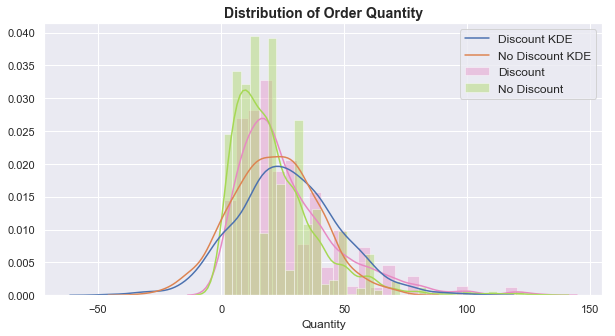

In [ ]:
# Visualizing Distribution of orders with/without discounts:
sns.set(rc={'figure.figsize':(10,5)})
sns.set()
ax = sns.distplot(df_discount_bool.Quantity, label='Discount', color='#E78AC3')
ax = sns.distplot(df_nodiscount_bool.Quantity, label='No Discount', color='#A6D854')
ax = sns.kdeplot(discount_KDE, label='Discount KDE')
ax = sns.kdeplot(no_discount_KDE, label='No Discount KDE')
ax.set_title('Distribution of Order Quantity', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

Based on the results above, we can see that there is some amount of skew present in the distribution of order sizes. However, because our data for orders has a minimum value of 1 (and our manually generated KDE plots do not) the level of skew is magnified due to the ranges present in KDE plots.

Based on the Central Limit Theorem, we can accept the above distributions to be normal and will therefore use a standard 2 tailed t-test in hypthesis testing.

In [ ]:
def results_printer(a, b):
    print(f'Avg with discount: {round(a, 2)}')
    print(f'Avg with no discount: {round(b, 2)}')
    print(f'Effect Size: {round((a-b),2)}')
    print(f'Relative effect size: {round((a-b)/b,2)}')

In [ ]:
def results_printer_disc(a, b):
    print(f'Avg at current discount level: {round(a, 2)}')
    print(f'Effect Size: {round((a-b),2)}')
    print(f'Relative effect size: {round((a-b)/b,2)}')

In [ ]:
a = df_discount_bool.Quantity.mean()
b = df_nodiscount_bool.Quantity.mean()
results_printer(a,b)

Avg with discount: 27.35
Avg with no discount: 21.72
Effect Size: 5.64
Relative effect size: 0.26


In [ ]:
# Testing distributions for normality:
stats.normaltest(df_discount_bool.Quantity)

NormaltestResult(statistic=261.04626710761113, pvalue=2.0631145260149106e-57)

In [ ]:
# Testing distributions for normality:
stats.normaltest(df_nodiscount_bool.Quantity)

NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119)

In [ ]:
# 2 Sided T:
pprint.pprint(stats.ttest_ind(df_discount_bool.Quantity, df_nodiscount_bool.Quantity))

Ttest_indResult(statistic=6.7627297036707565, pvalue=1.7401995278127614e-11)


#### 1a. Do discounts have a statistically significant effect on the number of products customers order?
* $H_{0}:$ Discount has no effect on the number of products ordered.
* $H_{a}:$ Discount does have an effect on number of products ordered.
* $\alpha$ = 0.05

**Discounts do have a statistically significant effect on the number of products customers order.**

The resulting p-value is less than our alpha value of 0.05. Therefore, we reject the null hypothesis that there is no difference between average order size for orders with and without discounts. Since we've confirmed that discounts do have a statistically significant effect on the number of products customers order, we can explore the difference in effect at each level of discount.

#### 1b. If so, at what level(s) of discount?
* $H_{0}:$ The average number of products ordered by customers is the same regardless of discount level.
<br>
* $H_{a}:$ The average number of products ordered by customers is not the same as discount level changes.
<br>
* $\alpha$ = 0.05

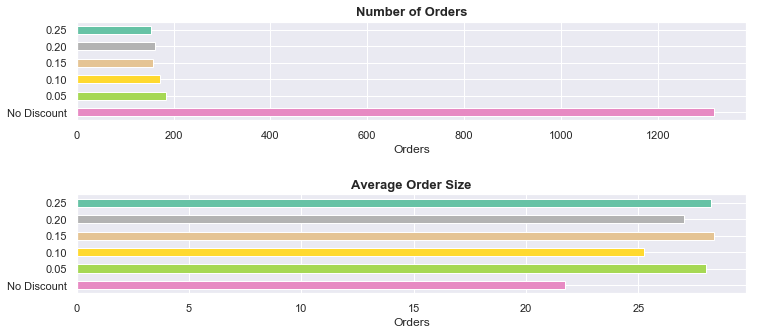

In [ ]:
# Repeating above visualization for each discount value:
fig, axes = plt.subplots(2, 1, figsize=(12,5))

# Grouping DataFrame for visualization:
df_discount_basic.groupby(['Discount'])['Quantity'].count().plot(kind='barh', ax=axes[0], \
                                    color=['#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5'])
df_discount_basic.groupby(['Discount'])['Quantity'].mean().plot(kind='barh', ax=axes[1], \
                                    color=['#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5'])

# Subplot 1 Labels:
axes[0].set_title('Number of Orders', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Orders')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'])

# Subplot 2 Labels:
axes[1].set_title('Average Order Size', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Orders')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'])
fig.subplots_adjust(hspace=.75);

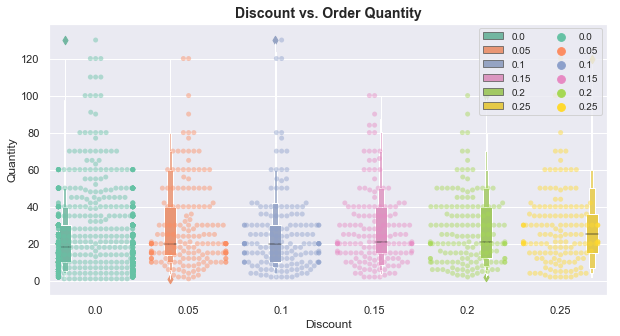

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.boxenplot(data=df_discount_basic, x=df_discount_basic.Discount, y=df_discount_basic.Quantity, \
                   hue=df_discount_basic.Discount, palette='Set2')
ax = sns.swarmplot(data=df_discount_basic, x=df_discount_basic.Discount, y=df_discount_basic.Quantity, \
                   hue=df_discount_basic.Discount, palette='Set2', alpha=.45)
ax.set_title('Discount vs. Order Quantity', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='small', ncol=2);

In contrast to our analysis in part 1a., when order quantity is visualized at each discount level we can observe a larger difference in number of orders and a smaller difference in average order size at each individual level of discount.

In [ ]:
# Fitting model to prepare to calculate ANOVA:
lm = ols('Quantity ~ C(Discount)', df_discount_bool).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6741
Date:                Sun, 16 Jun 2019   Prob (F-statistic):              0.610
Time:                        18:16:32   Log-Likelihood:                -3691.7
No. Observations:                 830   AIC:                             7393.
Df Residuals:                     825   BIC:                             7417.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.0108      1.525     18.372      0.000      25.018      31.003
C(Discount)[T.0.1]     -2.7738      2.193     -1.265      0.206      -7.079       1.531
C(Discount)[T.0.15]     0.3714      2.250      0.165      0.869      -4.045       4.788
C(Discount)[T.0.2]     -0.9860      2.235     -0.441      0.659      -5.373       3.401
C(Discount)[T.0.25]     0.2294      2.262      0.101      0.919      -4.211       4.669
==============================================================================
Omnibus:                      263.705   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.622
Skew:                           1.598   Prob(JB):                    6.13e-164
Kurtosis:                       6.394   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ANOVA analysis to test multiple pairwise comparisons:
sm.stats.anova_lm(lm, typ=2)

,sum_sq,df,F,PR(>F)
C(Discount),1159.517551,4.0,0.674103,0.610041
Residual,354768.342690,825.0,NaN,NaN


#### 1b. If so, at what level(s) of discount?
* $H_{0}:$ The average number of products ordered by customers is the same regardless of discount level.
<br>
* $H_{a}:$ The average number of products ordered by customers is not the same as discount level changes. 
<br>
* $\alpha$ = 0.05

**There is no statistically significant difference in products ordered between levels of discount.**

Reviewing the model above, we observe that the resulting p-values for each comparison between discount levels is greater than our alpha(.05), indicating that there is no significant difference between the order sizes for items at each discount level.

The results of the ANOVA test indicate a p-value of 0.61. Because the resulting p-value is greater than our alpha(0.05), we fail to reject the Null Hypothesis that the average number of products ordered by customers is the same regardless of discount level.

While valuable, the results obtained from our first inquiry necessitate consideration of item price to give context to the client. Before definining the parameters of our next inquiry, let's review the results obtained thusfar.

**Summation:**
<br>
There is a statistically significant difference in order quantity based on the presence of a discount at any level, but there is not a statistically significant difference between order quantity and discount level.

Great! We can safely advise our client that customers order more products when a discount is offered, but that the delta in customer order volume for each discount level is not statistically significant. However, this data doesn't tell the full story. In order to advise the client on whether (and at what level) to offer discounts, we must determine whether the increase in product orders for discounted items produces a statistically significant difference in every company's #1 metric for success, **revenue**. *(see 3)* 

Essentially, we need to determine whether or not customers spend more when discounts are present and whether additional spend exists to offset the loss in potential revenue due to discounts. For example, if there is no statistically significant difference in customer spend regardless of whether a 5% or 25% discount is offered, we would likely advise the client to reduce the discount level of most items to 5%.



## 2. Do discounts have a statistically significant effect on average customer spend per order? If so, at what level(s) of discount?

#### 2a. Do discounts have a statistically significant effect on average customer spend?
* $H_{0}:$ Discounts do not have a statistically significant effect on average customer spend.
<br>
* $H_{a}:$ Discounts do have a statistically significant effect (whether positive or negative) on average customer spend.
<br>
* $\alpha$ = 0.05

In [ ]:
df_discount_spend = pd.read_sql_query("""SELECT o.OrderId, o.UnitPrice, o.Discount, o.Quantity, p.QuantityPerUnit FROM [OrderDetail] o \
                    INNER JOIN Product p on o.ProductId = p.ID
                    GROUP BY o.OrderId;""", engine)
df_discount_spend.head()

2019-06-16 18:16:32,540 INFO sqlalchemy.engine.base.Engine SELECT o.OrderId, o.UnitPrice, o.Discount, o.Quantity, p.QuantityPerUnit FROM [OrderDetail] o                     INNER JOIN Product p on o.ProductId = p.ID
                    GROUP BY o.OrderId;
2019-06-16 18:16:32,541 INFO sqlalchemy.engine.base.Engine ()


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnit
0,10248,34.8,0.00,5,24 - 200 g pkgs.
1,10249,42.4,0.00,40,50 - 300 g pkgs.
2,10250,16.8,0.15,15,32 - 8 oz bottles
3,10251,16.8,0.00,20,32 - 8 oz bottles
4,10252,27.2,0.00,40,15 - 300 g rounds


In [ ]:
df_discount_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 5 columns):
OrderId            830 non-null int64
UnitPrice          830 non-null float64
Discount           830 non-null float64
Quantity           830 non-null int64
QuantityPerUnit    830 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 32.5+ KB


In [ ]:
df_discount_spend['QuantityPerUnit'] = df_discount_spend['QuantityPerUnit'].apply(lambda x: (x.split()))
df_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnit
0,10248,34.8,0.00,5,"[24, -, 200, g, pkgs.]"
1,10249,42.4,0.00,40,"[50, -, 300, g, pkgs.]"
2,10250,16.8,0.15,15,"[32, -, 8, oz, bottles]"
3,10251,16.8,0.00,20,"[32, -, 8, oz, bottles]"
4,10252,27.2,0.00,40,"[15, -, 300, g, rounds]"


In [ ]:
df_discount_spend.QuantityPerUnit.iloc[0]

['24', '-', '200', 'g', 'pkgs.']

In [ ]:
# Defining a function to extract the first element from each list:
def select_first_element(L, new_list=[]):
    for i in L:
        if type(i) == list:
            new_list.append(int(i[0]))
        else:
            pass
    return new_list

In [ ]:
# Extracting the first element from list:
L = df_discount_spend.QuantityPerUnit
QuantityPerUnitEdit = select_first_element(L)
# Testing Output:
print(QuantityPerUnitEdit[:15])
print(len(QuantityPerUnitEdit))

[24, 50, 32, 32, 15, 24, 5, 5, 12, 12, 24, 12, 24, 24, 24]
830


In [ ]:
# Inserting newly extracted list into new DataFrame column using np:
df_discount_spend['QuantityPerUnitEdit'] = np.array(QuantityPerUnitEdit)
df_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnit,QuantityPerUnitEdit
0,10248,34.8,0.00,5,"[24, -, 200, g, pkgs.]",24
1,10249,42.4,0.00,40,"[50, -, 300, g, pkgs.]",50
2,10250,16.8,0.15,15,"[32, -, 8, oz, bottles]",32
3,10251,16.8,0.00,20,"[32, -, 8, oz, bottles]",32
4,10252,27.2,0.00,40,"[15, -, 300, g, rounds]",15


In [ ]:
# Dropping 'QuantityPerUnit' column:
df_discount_spend.drop(['QuantityPerUnit'], axis=1, inplace=True)
df_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit
0,10248,34.8,0.00,5,24
1,10249,42.4,0.00,40,50
2,10250,16.8,0.15,15,32
3,10251,16.8,0.00,20,32
4,10252,27.2,0.00,40,15


In [ ]:
# Reviewing DataFrame description:
df_discount_spend.describe()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit
count,830.000000,830.000000,830.000000,830.000000,830.000000
mean,10662.500000,24.868578,0.054157,22.883133,57.786747
std,239.744656,25.800797,0.082725,18.952727,139.016931
min,10248.000000,2.000000,0.000000,1.000000,1.000000
25%,10455.250000,12.000000,0.000000,10.000000,12.000000
50%,10662.500000,18.000000,0.000000,20.000000,24.000000
75%,10869.750000,33.250000,0.100000,30.000000,24.000000
max,11077.000000,263.500000,0.250000,130.000000,750.000000


In [ ]:
df_discount_spend.head(15)

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit
0,10248,34.8,0.00,5,24
1,10249,42.4,0.00,40,50
2,10250,16.8,0.15,15,32
3,10251,16.8,0.00,20,32
4,10252,27.2,0.00,40,15
5,10253,16.0,0.00,40,24
6,10254,8.0,0.00,21,5
7,10255,44.0,0.00,30,5
8,10256,10.4,0.00,12,12
9,10257,10.4,0.00,15,12


In [ ]:
# Multiplying UnitPrice by the QuantityPerUnit and Quantity to obtain total order price:
#df_discount_spend['OrderPrice'] = 
discount_list = df_discount_spend.Discount
unitprice_list = df_discount_spend.UnitPrice
quantity_list = df_discount_spend.Quantity
quantity_per_unit_list = df_discount_spend.QuantityPerUnitEdit

def order_cost_calc(discount_list, unitprice_list, quantity_list, quantity_per_unit_list, new_list=[]):
    for i in range(len(discount_list)):
        if discount_list[i] == 0:
            new_list.append((unitprice_list[i] * quantity_per_unit_list[i] * quantity_list[i]))
        else:
            new_list.append((unitprice_list[i] * quantity_list[i] * (1-discount_list[i]) * quantity_per_unit_list[i]))
    return new_list

In [ ]:
# Making sure discounts are applied where applicable:
OrderPrice = order_cost_calc(discount_list, unitprice_list, quantity_list, quantity_per_unit_list)
print(OrderPrice[:5]) # Value of OrderPrice[3] confirms correct application of discount.

[4176.0, 84800.0, 6854.4, 10752.0, 16320.0]


In [ ]:
# Confirming list length equals length of DataFrame:
print(len(OrderPrice))
# Confirming that all values for OrderPrice are non-zero:
print(min(OrderPrice))

830
60.0


In [ ]:
# Inserting new column 'OrderPrice' into DataFrame:
df_discount_spend['OrderPrice'] = np.array(OrderPrice)
df_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice
0,10248,34.8,0.00,5,24,4176.0
1,10249,42.4,0.00,40,50,84800.0
2,10250,16.8,0.15,15,32,6854.4
3,10251,16.8,0.00,20,32,10752.0
4,10252,27.2,0.00,40,15,16320.0


In [ ]:
# Creating a new column to identify presence of Discount/no Discount:
df_discount_spend['DiscBool'] = df_discount_spend['Discount'].apply(lambda x: 0 if x == 0 else 1)
df_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
0,10248,34.8,0.00,5,24,4176.0,0
1,10249,42.4,0.00,40,50,84800.0,0
2,10250,16.8,0.15,15,32,6854.4,1
3,10251,16.8,0.00,20,32,10752.0,0
4,10252,27.2,0.00,40,15,16320.0,0


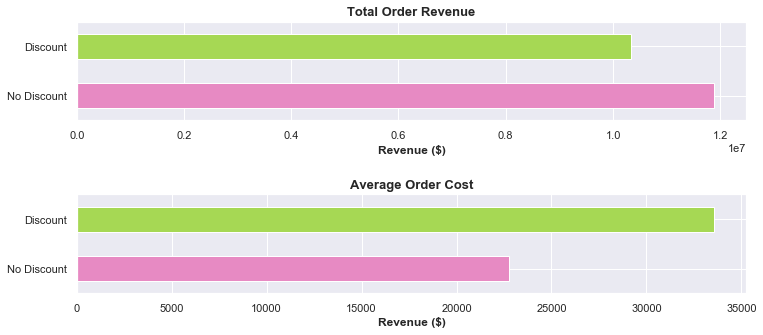

In [ ]:
# Visualizing Order Price by hue DiscBool:
fig, axes = plt.subplots(2, 1, figsize=(12,5))

# Grouping DataFrame for visualization:
df_discount_spend.groupby(['DiscBool'])['OrderPrice'].sum().plot(kind='barh', ax=axes[0], color=['#E78AC3', '#A6D854'])
df_discount_spend.groupby(['DiscBool'])['OrderPrice'].mean().plot(kind='barh', ax=axes[1], color=['#E78AC3', '#A6D854'])

# Subplot 1 Labels:
axes[0].set_title('Total Order Revenue', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', 'Discount'])

#Subplot 2 Labels:
axes[1].set_title('Average Order Cost', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', 'Discount'])
fig.subplots_adjust(hspace=.75);

Based on the visualization above, we can determine that Northwind generates more total revenue from sales of non-discounted items. However, the average order cost for orders containing discounts is greater than those without discounts. To determine whether this difference is statistically significant, we should first review the distribution of Order Price for orders with and without discount(s).

In [ ]:
# Segmenting df_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_discount_spend_disc = df_discount_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_discount_spend_nodisc = df_discount_spend.query(query2)

In [ ]:
# Previewing newly created DataFrame:
print(len(df_discount_spend_disc))
df_discount_spend_disc.head()

308


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
2,10250,16.8,0.15,15,32,6854.40,1
10,10258,25.6,0.20,6,24,2949.12,1
12,10260,12.0,0.25,21,24,4536.00,1
15,10263,8.0,0.25,36,5,1080.00,1
16,10264,7.7,0.15,25,12,1963.50,1


In [ ]:
# Viewing distributions of newly created DataFrame:
df_discount_spend_disc.describe()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02,308.0
mean,10653.461039,24.464058,0.145942,27.428571,61.214286,3.358123e+04,1.0
std,230.064716,21.738923,0.070996,22.444098,147.919269,1.232602e+05,0.0
min,10250.000000,2.500000,0.050000,2.000000,1.000000,7.200000e+01,1.0
25%,10459.000000,12.000000,0.100000,12.000000,12.000000,2.904120e+03,1.0
50%,10642.500000,18.000000,0.150000,20.000000,24.000000,7.175000e+03,1.0
75%,10844.000000,32.912500,0.200000,35.000000,24.000000,1.580400e+04,1.0
max,11076.000000,210.800000,0.250000,130.000000,750.000000,1.579500e+06,1.0


In [ ]:
def KDE_gen(mu, sigma, n):
    x = np.random.normal(mu,sigma,n)
    return x

In [ ]:
# Creating Normal Distribution using DataFrame description:
discount_KDE = KDE_gen(33581.23, 123260.2, 308)

In [ ]:
# Previewing newly created DataFrame:
print(len(df_discount_spend_nodisc))
df_discount_spend_nodisc.head()

522


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
0,10248,34.8,0.0,5,24,4176.0,0
1,10249,42.4,0.0,40,50,84800.0,0
3,10251,16.8,0.0,20,32,10752.0,0
4,10252,27.2,0.0,40,15,16320.0,0
5,10253,16.0,0.0,40,24,15360.0,0


In [ ]:
# Viewing distributions of newly created DataFrame:
df_discount_spend_nodisc.describe()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
count,522.000000,522.000000,522.0,522.000000,522.000000,522.000000,522.0
mean,10667.833333,25.107261,0.0,20.201149,55.764368,22779.259004,0.0
std,245.338086,27.939034,0.0,15.978385,133.591063,61160.751644,0.0
min,10248.000000,2.000000,0.0,1.000000,1.000000,60.000000,0.0
25%,10450.500000,12.500000,0.0,9.000000,12.000000,2250.000000,0.0
50%,10680.000000,18.000000,0.0,16.000000,24.000000,5365.900000,0.0
75%,10887.750000,33.250000,0.0,30.000000,24.000000,15300.000000,0.0
max,11077.000000,263.500000,0.0,130.000000,750.000000,720000.000000,0.0


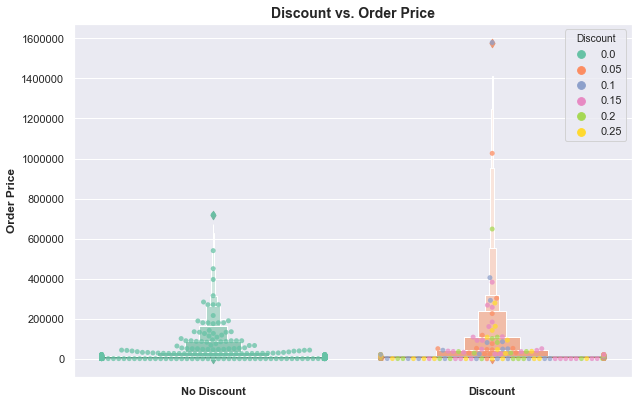

In [ ]:
sns.set(rc={'figure.figsize':(10,6.5)})

ax = sns.boxenplot(data=df_discount_spend, x=df_discount_spend.DiscBool, y=df_discount_spend.OrderPrice, palette='Set2')
ax = sns.swarmplot(data=df_discount_basic, x=df_discount_spend.DiscBool, y=df_discount_spend.OrderPrice, hue=df_discount_spend.Discount, palette='Set2', alpha=.75)
ax.set_title('Discount vs. Order Price', fontsize=14, fontweight='bold')
ax.set_ylabel('Order Price', fontweight='semibold')
ax.set_xlabel('')
ax.set_xticklabels(['No Discount', 'Discount'], fontweight='semibold');

In [ ]:
no_discount_KDE = KDE_gen(22779.26, 61160.75, 522)

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


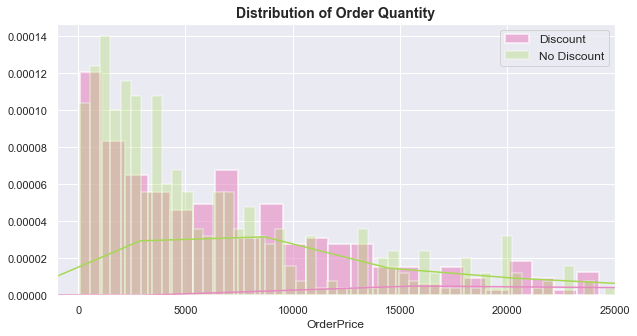

In [ ]:
# Visualizing Distribution of Order Price with/without discounts:
sns.set(rc={'figure.figsize':(10,5)})
#ax = fig.add_axes([0,0,1,1])
#ax2 = fig.add_axes([0.2,0.5,.4,.4])

ax = sns.distplot(df_discount_spend_disc.OrderPrice, label='Discount', color='#E78AC3', bins=1500,
                 hist_kws={"linewidth": 2, "alpha": .6})
ax = sns.distplot(df_discount_spend_nodisc.OrderPrice, label='No Discount', color='#A6D854', bins=1500,
                  hist_kws={"linewidth": 2, "alpha": .3})

sns.pairplot
#ax = sns.kdeplot(discount_KDE, label='Discount KDE')
#ax = sns.kdeplot(no_discount_KDE, label='No Discount KDE')
ax.set_xlim(-1000, 25000)
ax.set_title('Distribution of Order Quantity', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

After reviewing the data above, it appears that some very expensive orders are causing skew in the distributions above. Before determining how to proceed, let's first visualize and compare the shapes of the distributions above in separate plots.

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


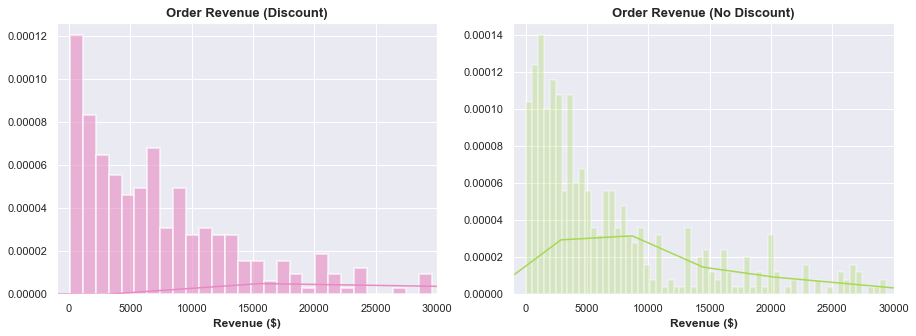

In [ ]:
# Visualizing Distribution of Order Price with/without discounts:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(df_discount_spend_disc.OrderPrice, label='Discount', color='#E78AC3', bins=1500, ax=axes[0], 
                 hist_kws={"linewidth": 2, "alpha": .6})
sns.distplot(df_discount_spend_nodisc.OrderPrice, label='No Discount', color='#A6D854', bins=1500, ax=axes[1], 
                  hist_kws={"linewidth": 2, "alpha": .3})

# Subplot 1 Labels:
axes[0].set_title('Order Revenue (Discount)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Revenue ($)', fontweight='semibold')
axes[0].set_ylabel('')
axes[0].set_xlim(-1000, 30000)

#Subplot 2 Labels:
axes[1].set_title('Order Revenue (No Discount)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Revenue ($)', fontweight='semibold')
axes[1].set_ylabel('')
axes[1].set_xlim(-1000, 30000)
fig.subplots_adjust(hspace=.75);

A visual examination of the distribution of Order Revenue suggests that we should transform the data to fit a normal distribution before modeling and hypothesis testing.

We'll first log-scale order revenu and examine the resulting distributions.

In [ ]:
# Creating/previewing a copy of the df_discount_spend DataFrame:
df_log_discount_spend = df_discount_spend.copy()
df_log_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool
0,10248,34.8,0.00,5,24,4176.0,0
1,10249,42.4,0.00,40,50,84800.0,0
2,10250,16.8,0.15,15,32,6854.4,1
3,10251,16.8,0.00,20,32,10752.0,0
4,10252,27.2,0.00,40,15,16320.0,0


In [ ]:
# Log-scaling Order Price:
log_order_price = np.log(df_log_discount_spend.OrderPrice)
df_log_discount_spend['LogOrderPrice'] = log_order_price

# Previewing DataFrame:
df_log_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.00,5,24,4176.0,0,8.337109
1,10249,42.4,0.00,40,50,84800.0,0,11.348051
2,10250,16.8,0.15,15,32,6854.4,1,8.832646
3,10251,16.8,0.00,20,32,10752.0,0,9.282847
4,10252,27.2,0.00,40,15,16320.0,0,9.700147


In [ ]:
# Segmenting df_log_discount_spend based on presence of discount:
# Create DataFrame where value for Discount > 0:
query1 = 'Discount > 0'
df_log_discount_spend_disc = df_log_discount_spend.query(query1)

# Create DataFrame where value for Discount == 0:
query2 = 'Discount == 0'
df_log_discount_spend_nodisc = df_log_discount_spend.query(query2)

In [ ]:
# Verifying Output:
print(len(df_log_discount_spend_disc))
df_log_discount_spend_disc.head()

308


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool,LogOrderPrice
2,10250,16.8,0.15,15,32,6854.40,1,8.832646
10,10258,25.6,0.20,6,24,2949.12,1,7.989262
12,10260,12.0,0.25,21,24,4536.00,1,8.419801
15,10263,8.0,0.25,36,5,1080.00,1,6.984716
16,10264,7.7,0.15,25,12,1963.50,1,7.582484


In [ ]:
# Verifying Output:
print(len(df_log_discount_spend_nodisc))
df_log_discount_spend_nodisc.head()

522


,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.0,5,24,4176.0,0,8.337109
1,10249,42.4,0.0,40,50,84800.0,0,11.348051
3,10251,16.8,0.0,20,32,10752.0,0,9.282847
4,10252,27.2,0.0,40,15,16320.0,0,9.700147
5,10253,16.0,0.0,40,24,15360.0,0,9.639522


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


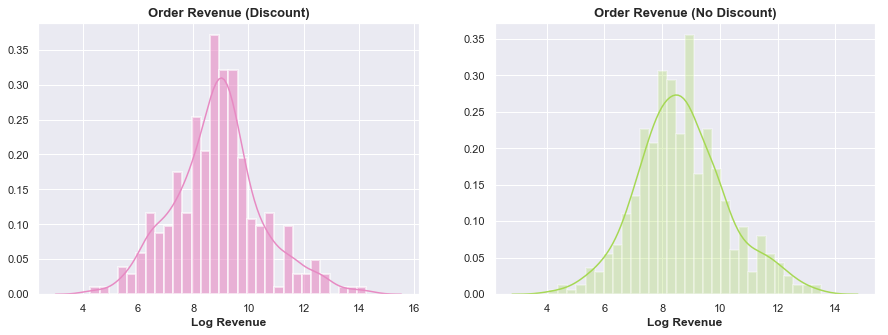

In [ ]:
# Repeating the visualizations above using new column 'LogOrderPrice':
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(df_log_discount_spend_disc.LogOrderPrice, label='Discount', color='#E78AC3', bins=30, ax=axes[0], 
                 hist_kws={"linewidth": 2, "alpha": .6})
sns.distplot(df_log_discount_spend_nodisc.LogOrderPrice, label='No Discount', color='#A6D854', bins=30, ax=axes[1], 
                  hist_kws={"linewidth": 2, "alpha": .3})

# Subplot 1 Labels:
axes[0].set_title('Order Revenue (Discount)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Log Revenue', fontweight='semibold')
axes[0].set_ylabel('')
#axes[0].set_xlim(-1000, 30000)

#Subplot 2 Labels:
axes[1].set_title('Order Revenue (No Discount)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Log Revenue', fontweight='semibold')
axes[1].set_ylabel('')
#axes[1].set_xlim(-1000, 30000)
fig.subplots_adjust(hspace=.75);

Great! Log transforming Order Revenue has normalized the data for both distributions. As our sample size is "large" for both distributions and distribution is normal, we can determine whether the presence of a discount has a statistically significant effect on Order Price using a standard two-tailed t-test.

In [ ]:
a = df_log_discount_spend_disc.OrderPrice.mean()
b = df_log_discount_spend_nodisc.OrderPrice.mean()
results_printer(a,b)

Avg with discount: 33581.23
Avg with no discount: 22779.26
Effect Size: 10801.97
Relative effect size: 0.47


In [ ]:
a = df_log_discount_spend_disc.LogOrderPrice.mean()
b = df_log_discount_spend_nodisc.LogOrderPrice.mean()
results_printer(a,b)

Avg with discount: 8.88
Avg with no discount: 8.7
Effect Size: 0.19
Relative effect size: 0.02


In [ ]:
# Using a two-tailed t-test to compare distributions above:
stats.ttest_ind(df_log_discount_spend_disc.LogOrderPrice, df_log_discount_spend_nodisc.LogOrderPrice)

Ttest_indResult(statistic=1.6499761178500325, pvalue=0.09932708305041704)

The resulting p-value of our two-tailed t-test is 0.10, and is less than our $\alpha$ value of 0.05.

#### 2a. Do discounts have a statistically significant effect on average customer spend?
* $H_{0}:$ Discounts do not have a statistically significant effect on average customer spend.
<br>
* $H_{a}:$ Discounts do have a statistically significant effect (whether positive or negative) on average customer spend.
<br>
* $\alpha$ = 0.05

Because p-value <  $\alpha$(0.05), we reject the null hypothesis that states that discounts do not have a statistically significant effect on customer order spend amount. We can conclude with ~99% certainty that the results of our test are not due to random chance (a type I error), and that discounts do have a statistically significant effect on customer order spend.

#### 1b. If so, at what level(s) of discount?
* $H_{0}:$ Customer order price is the same regardless of discount level.
<br>
* $H_{a}:$ Customer order price is not the same as discount level changes.
<br>
* $\alpha$ = 0.05

In [ ]:
df_log_discount_spend.head()

,OrderId,UnitPrice,Discount,Quantity,QuantityPerUnitEdit,OrderPrice,DiscBool,LogOrderPrice
0,10248,34.8,0.00,5,24,4176.0,0,8.337109
1,10249,42.4,0.00,40,50,84800.0,0,11.348051
2,10250,16.8,0.15,15,32,6854.4,1,8.832646
3,10251,16.8,0.00,20,32,10752.0,0,9.282847
4,10252,27.2,0.00,40,15,16320.0,0,9.700147


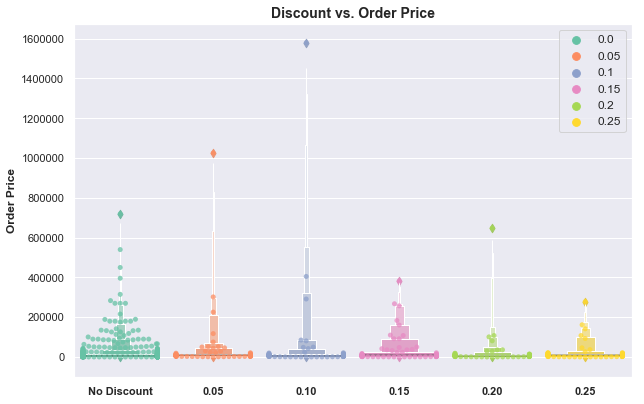

In [ ]:
sns.set(rc={'figure.figsize':(10,6.5)})

ax = sns.boxenplot(data=df_log_discount_spend, x=df_discount_spend.Discount, y=df_discount_spend.OrderPrice, palette='Set2')
ax = sns.swarmplot(data=df_log_discount_spend, x=df_discount_spend.Discount, y=df_discount_spend.OrderPrice, hue=df_discount_spend.Discount, palette='Set2', alpha=.75)
ax.set_title('Discount vs. Order Price', fontsize=14, fontweight='bold')
ax.set_ylabel('Order Price', fontweight='semibold')
ax.set_xlabel('')
ax.set_xticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'], fontweight='semibold');
ax.legend(loc=1, fontsize='medium')

In [ ]:
# Creating New DataFrames for varying discount level:
df_log_ds_nodisc = df_log_discount_spend[df_log_discount_spend.Discount.isin([0])]
df_log_ds_5p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.05])]
df_log_ds_10p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.10])]
df_log_ds_15p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.15])]
df_log_ds_20p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.20])]
df_log_ds_25p = df_log_discount_spend[df_log_discount_spend.Discount.isin([.25])]

In [ ]:
print(f'Num Orders with no discount: {len(df_log_ds_nodisc)}')
print(f'Num Orders with 5% discount: {len(df_log_ds_5p)}')
print(f'Num Orders with 10% discount: {len(df_log_ds_10p)}')
print(f'Num Orders with 15% discount: {len(df_log_ds_15p)}')
print(f'Num Orders with 20% discount: {len(df_log_ds_20p)}')
print(f'Num Orders with 25% discount: {len(df_log_ds_25p)}')

Num Orders with no discount: 522
Num Orders with 5% discount: 70
Num Orders with 10% discount: 57
Num Orders with 15% discount: 65
Num Orders with 20% discount: 60
Num Orders with 25% discount: 56


In [ ]:
'#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5'

('#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3', '#66C2A5')

In [ ]:
# Visualizing Distribution of Order Price with/without discounts:
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.distplot(df_log_ds_nodisc.LogOrderPrice, label='No Discount', color='#E78AC3', bins=30,
                 hist_kws={"linewidth": 2, "alpha":.4})
ax = sns.distplot(df_log_ds_5p.LogOrderPrice, label='5% Discount', color='#A6D854', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_10p.LogOrderPrice, label='10% Discount', color='#FFD92F', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_15p.LogOrderPrice, label='15% Discount', color='#E5C494', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_20p.LogOrderPrice, label='20% Discount', color='#B3B3B3', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})
ax = sns.distplot(df_log_ds_25p.LogOrderPrice, label='25% Discount', color='#66C2A5', bins=30,
                  hist_kws={"linewidth": 2, "alpha": .4})

ax.set_xlabel('Log Order Price', fontweight='semibold')
ax.set_title('Distribution of Order Price by Discount', fontsize=14, fontweight='bold')
ax.legend(loc=1, fontsize='medium');

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Distribution of Order price appears normal across each discount level. We can now fit the data above to a model and use ANOVA to measure variance between samples populations.

In [ ]:
df_log_discount_spend.head()

In [ ]:
# Fitting data to model:
lm = ols('LogOrderPrice ~ C(Discount)', df_log_discount_spend).fit()

In [ ]:
# Printing OLS Regression Results:
lm.summary()

In [ ]:
# ANOVA test:
sm.stats.anova_lm(lm, typ=2)

In [ ]:
def percent_dif_revenue(df_list):
    print('')
    print('Percent Difference in Revenue between No Discount & each Discount Level:')
    print('')
    print(linespacer+'------------------------------')
    for i in range(len(df_list)):
        print(f'Mean Revenue per Order at Discount Level {round((i*.05),2)} = {df_list[i].mean()}')
        print(f'Percent Difference for Discount Level {round((i*.05),2)} = {((df_list[i].mean() - df_list[0].mean())/df_list[0].mean())*100}')
        results_printer(df_list[i].mean(), df_list[0].mean())
        print(linespacer+'------------------------------')

In [ ]:
percent_dif_revenue(df_list)

In [ ]:
def percent_dif_revenue_for_discounts(df_list):
    print('')
    print('Percent Difference in Revenue between Discount Levels:')
    print('')
    print(linespacer+'------------------------------')
    for i in range(len(df_list)-1):
        print(f'Mean Revenue per Order at Discount Level {round((i*.05),2)} = {round(df_list[i].mean(),2)}')
        print(f'Percent Difference between Discount Level {round((i*.05),2)} and Level {round(((i*.05)+.05),2)} = {round((((df_list[i+1].mean() - df_list[i].mean())/df_list[i].mean())*100),2)}%')
        results_printer_disc(df_list[i+1].mean(), df_list[i].mean())
        print(linespacer+'------------------------------')

In [ ]:
percent_dif_revenue_for_discounts(df_list)

## 3. Do discounts have a statistically significant effect on the number of products customers order by category? If so, at what level(s) of discount?
*Note:  Product categories include 'Beverages', 'Condiments', 'Confections', 'Dairy Products',
       'Grains/Cereals', 'Meat/Poultry', 'Produce', and 'Seafood'.*

#### 3a. Do discounts have a statistically significant effect on the number of products customers order by category?
* $H_{0}:$ Discounts do not have a statistically significant effect on number of products customers order by category.
<br>
* $H_{a}:$ Discounts either increase or decrease the number of products customers order by category.
<br>
* $\alpha$ = 0.05

Maybe:
## 4. Does discount size (in dollars) or discount percentage have a greater effect on number of orders? If so, at what level(s) of discount? 

## 5. Does the product category have a statistically significant effect on order size for orders made by region? 

## Not complete yet/Scratchwork:
This looks like it is significant based on p but may need to look at welch and other stuff

In [ ]:
# May use this for a continuous variables later

'''
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (18,10))
sns.distplot(df_discount_basic.Discount, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'#66C2A5',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 2,
                                  'color': "#FC8D62",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : '#8DA0CB',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                         'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df_discount_basic.Discount, ax = ax,color = '#66C2A5')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.25))
plt.ylim(0, 50)
plt.legend(loc='best')
'''

In [ ]:
# SQL Queries I don't know what to do with yet

In [ ]:
'''
df_discount_orders = pd.read_sql_table("""SELECT Quantity, DiscBool Count(*) as DiscTrue \
            FROM df_discount_basic""", engine)
df_discount_orders.head()
'''

In [ ]:
q = """SELECT c.CategoryName, p.Id, od.ProductId, od.Discount, AVG(od.Discount) avg_discount, p.QuantityPerUnit, od.Quantity, Count(*) num_orders \
            FROM [Category] c \
            INNER JOIN Product p on c.Id = p.Id \
            INNER JOIN OrderDetail od on p.Id = od.ProductId
            GROUP BY c.CategoryName \
            """
df_category_grouped = pd.read_sql_query(q, engine)
df_category_grouped.head(10)

In [ ]:
sum(df_category_grouped.Discount.values)

In [ ]:
len(df_category_grouped.Discount.values)

In [ ]:
calculate_mu(df_category_grouped.Discount)

In [ ]:
'''
# Visualize Number of Products Sold by Category

sns.set()
sns.set_context('notebook')
sns.set_palette('colorblind')


sax = sns.countplot(x = "CategoryName", data=df_category_grouped);

sns.scatterplot(data=df_category_grouped, x=a, y=b, legend='full')
'''

1)
<br>
H0: Discount affects sales evenly across all product categories
<br>
Ha: Discount does not affect sales evenly across all product categories
<br>
<br>

In [ ]:
len(df_category_grouped.index)

In [ ]:
df_category_grouped.index

In [ ]:
df_category_grouped.CategoryName.unique()

In [ ]:
df_category_grouped['QuantCalc'] = [200, 24, 12, 48, 36, 12, 12, 12]
df_category_grouped['UnitQuantityOrdered'] = df_category_grouped.num_orders * df_category_grouped.QuantCalc
df_category_grouped.head(10)

In [ ]:
a,b = np.array(df_category_grouped.Discount), np.array(df_category_grouped.UnitQuantityOrdered)
a, b

In [ ]:
df_category_grouped.Discount.hist()

In [ ]:
df_category_grouped.UnitQuantityOrdered.hist()

In [ ]:
Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, \
    EmployeeTerritory, Order, OrderDetail, Product, Region, Shipper, \
    Supplier, Territory = Base.classes.Category, Base.classes.Customer, \
    Base.classes.CustomerCustomerDemo, Base.classes.CustomerDemographic, \
    Base.classes.Employee, Base.classes.EmployeeTerritory, Base.classes.Order, \
    Base.classes.OrderDetail, Base.classes.Product, Base.classes.Region, \
    Base.classes.Shipper, Base.classes.Supplier, Base.classes.Territory

In [ ]:
Category, Customer

In [ ]:
for prod, cat in session.query(Product, Category).filter(Product.CategoryId==Category.Id).all():
    print(f'Product Name: {prod.ProductName}\n Category Name: {cat.CategoryName}')

In [ ]:
'''
df_discounts = pd.read_sql_query("""SELECT o.OrderId, o.UnitPrice, o.Discount, o.Quantity, p.QuantityPerUnit FROM [OrderDetail] o \
                    INNER JOIN Product p on o.ProductId = p.ID
                    GROUP BY o.OrderId;""", engine)

df_discounts.head(50)
'''

In [ ]:
'''
x = df_discounts.Discount.values
y = df_discounts.UnitsOnOrder.values
for value in x:
    pairs = []
    pairs.append(zip([(x[value], y[value])]))
'''    

In [ ]:
df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders
            FROM [Order] o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY
            c.CompanyName ORDER BY num_orders DESC;""", engine)
df.head()

Ideas:
- Visualize num sales by product
- Visualize num sales by category

- Compare s

In [ ]:
# Ignore below for now:

'''
len(df_category_grouped.index)

df_category_grouped.index

df_category_grouped['QuantCalc'] = [200, 24, 12, 48, 36, 12, 12, 12]
df_category_grouped['UnitQuantityOrdered'] = df_category_grouped.num_orders * df_category_grouped.QuantCalc
df_category_grouped.head(10)

a,b = np.array(df_category_grouped.Discount), np.array(df_category_grouped.UnitQuantityOrdered)
a, b

df_category_grouped.Discount.hist()

df_category_grouped.UnitQuantityOrdered.hist()

# Calculate Population Mean:
def calculate_mu(x):
    d = float(sum(x.values)/len(x))
    return (d)

'''
# Calculate Sample Means:
def calc_sample_means(sample_size, data):
    n = sample_size
    
    # Calc population mean:
    mu = calculate_mu(data)
    print(f'Population Mean: {mu}')
    
    # Generate all combinations using given sample size 'n':
    combs = list(itertools.combinations(data, n))
    print(f'Combinations: {combs}')
    
    # Calculate Sample Means
    x_bar_list = []
    
    for i in range(len(combs)):
        sum = 0
        for j in range n:
            key = combs[i][j]
'''

sum(df_category_grouped.Discount.values)

len(df_category_grouped.Discount.values)

calculate_mu(df_category_grouped.Discount)

# Visualize Number of Products Sold by Category

sns.set()
sns.set_context('notebook')
sns.set_palette('colorblind')


sax = sns.countplot(x = "CategoryName", data=df_category_grouped);

sns.scatterplot(data=df_category_grouped, x=a, y=b, legend='full')

'''
df = pd.read_sql_query("""SELECT o.ID, c.CompanyName, Count(*) num_orders
            FROM [Order] o INNER JOIN Customer c on o.CustomerID = c.ID GROUP BY
            c.CompanyName ORDER BY num_orders DESC;""", engine)
df.head()



meta = MetaData()
meta.reflect(bind=engine)
users_table = meta.tables['users']
addresses_table = meta.tables['addresses']

pprint.pprint(users_table)

tables

metadata = MetaData()
metadata.reflect(engine)

Base = automap_base(metadata=metadata)
Base.prepare()

# This is an incomplete function to map tables to classes:
'''
def prepare_classes(tables):
    class_list = []
    for table in tables:
        table = class_list.append('Base.classes.'+table)
    return class_list
bases = prepare_classes(tables)
bases
'''
''''''
Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, \
    EmployeeTerritory, Order, OrderDetail, Product, Region, Shipper, \
    Supplier, Territory = Base.classes.Category, Base.classes.Customer, \
    Base.classes.CustomerCustomerDemo, Base.classes.CustomerDemographic, \
    Base.classes.Employee, Base.classes.EmployeeTerritory, Base.classes.Order, \
    Base.classes.OrderDetail, Base.classes.Product, Base.classes.Region, \
    Base.classes.Shipper, Base.classes.Supplier, Base.classes.Territory

Category, Customer

for prod, cat in session.query(Product, Category).filter(Product.CategoryId==Category.Id).all():
    print(f'Product Name: {prod.ProductName}\n Category Name: {cat.CategoryName}')


In [ ]:
# Maybe use this maybe not:
# Visualizing correlation between discount and order quantity:

pp = sns.pairplot(df_discount_basic, kind='reg', x_vars =('DiscBool', 'Discount'), hue='Discount',
             y_vars='Quantity', height=6, aspect=1.2, palette='Set2')
pp = pp.fig
fig.subplots_adjust(top=1.24, wspace=.25)
pp.suptitle('Discount vs. Order Quantity', fontsize=15, fontweight='bold', y=1.1)